<a href="https://colab.research.google.com/github/yeonjunky/learn_ml/blob/main/2_Least_Squares_Estimation_(Scikit_learn_LinearRegression%2C_%EB%8B%B9%EB%87%A8%EB%B3%91_%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error

<br>
<br>

#### 1. (당뇨병 진행도) 데이터 읽어들이기

In [3]:
diabetes = datasets.load_diabetes()

In [4]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
dir(diabetes)

['data', 'target']

In [12]:
print(diabetes['data'].shape)
print(diabetes.target.shape)
print(diabetes.DESCR)

(442, 10)
(442,)
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note

In [8]:
df = pd.DataFrame(diabetes.data) # Array to dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


- 나이, 성별, BMI(body mass index) 지수, 혈압 및 6개의 혈청 검사 수치
- -> 1년 후의 당뇨병 진행도

#### 기본적으로 array 형태로 저장되어 있으므로 바로 활용 가능

In [11]:
print(diabetes.data.shape) # '모양'
print(diabetes.target.shape)

(442, 10)
(442,)


In [13]:
diabetes.data[0, :]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

<br>
<br>

#### 2. Feature 선택하기

In [14]:
# Use one or many feature (visualization is only for one feature)

diabetes_X = diabetes.data[:, 2:3] # Try column index 2 first (Body Mass Index)
diabetes_X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [15]:
diabetes_Y = diabetes.target
diabetes_Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

<br>
<br>

#### 3. Training & Test set 으로 나눠주기

In [16]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(diabetes_X, 
                                                                    diabetes_Y, 
                                                                    test_size=0.3, 
                                                                    random_state=0)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(309, 1)
(133, 1)
(309,)
(133,)


<br>
<br>

#### 4. 비어있는 모델 객체 만들기

In [18]:
# Try simple linear regression first
model = linear_model.LinearRegression()

In [19]:
dir(linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'GammaRegressor',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'PoissonRegressor',
 'QuantileRegressor',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDOneClassSVM',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 'TweedieRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bayes',
 '_cd_fast',
 '_coordinate_descent',
 '_glm',
 '_huber',
 '_l

<br>
<br>

#### 5. 모델 객체 학습시키기 (on training data)

In [21]:
# Train the model using the training sets

model.fit(x_train, y_train)

LinearRegression()

<br>
<br>

#### 6. 학습이 끝난 모델 테스트하기 (on test data)

In [23]:
# Train 데이터에 대한 Model 의 Mean squared error 
print('MSE(Training data) : ', mean_squared_error(y_train, model.predict(x_train)))

MSE(Training data) :  3892.7208150824304


In [27]:
# Test 데이터에 대한 Model 의 Mean squared error 
print('MSE(Test data) : ', mean_squared_error(y_test, model.predict(x_test)))

MSE(Test data) :  3921.3720274248517


In [28]:
# Square root of error
np.sqrt( mean_squared_error(model.predict(x_test), y_test) )

62.62085936351282

<br>
<br>

#### 7. 모델 시각화

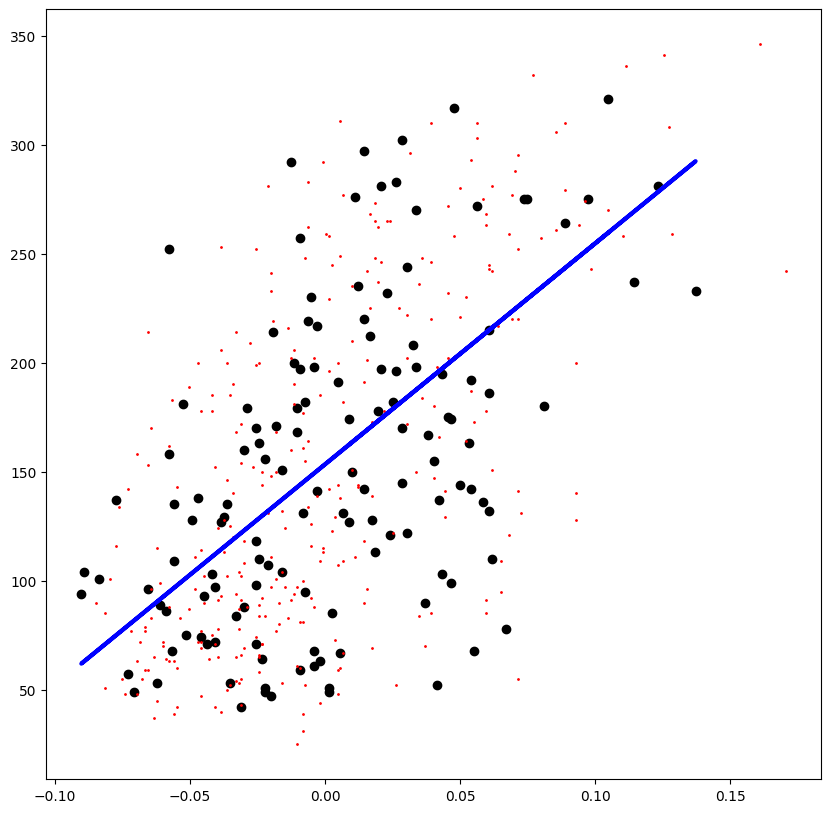

In [29]:
plt.figure(figsize=(10, 10))

plt.scatter(x_test, y_test, color="black") # Test data
plt.scatter(x_train, y_train, color="red", s=1) # Train data

plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line

plt.show()

In [69]:
plt.figure(figsize=(10, 10))

# plt.scatter(diabetes_X[:, :], diabetes_Y)
# plt.show()
type(diabetes.data)
diabetes_X = np.concatenate((diabetes.data[:, 2:3], 
                            diabetes.data[:, 3:4], 
                            diabetes.data[:, 8:9], 
                            diabetes.data[:, 9:10])) 
print(diabetes.data[:, 2:3].shape, 
      diabetes.data[:, 3:4].shape, 
      diabetes.data[:, 8:9].shape, 
      diabetes.data[:, 9:10].shape)

(442, 1) (442, 1) (442, 1) (442, 1)


<Figure size 1000x1000 with 0 Axes>

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

<br>
<br>

#### Practice. 더 좋은 성능을 보이는 Feature 를 찾아보세요!

In [72]:
from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error

# 1. Prepare the data (array!)
diabetes = datasets.load_diabetes()

# 2. Feature selection
diabetes_X = np.concatenate((diabetes.data[:, 2:3], 
                            diabetes.data[:, 3:4], 
                            diabetes.data[:, 8:9], 
                            diabetes.data[:, 9:10]), axis=1) 
diabetes_Y = diabetes.target

# 3. Train/Test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(diabetes_X, 
                                                                    diabetes_Y, 
                                                                    test_size=0.3, 
                                                                    random_state=0)

# 4. Create model object 
model = linear_model.LinearRegression()

# 5. Train the model 
model.fit(x_train, y_train)

# 6. Test the model
print('MSE(Training data) : ', mean_squared_error(model.predict(x_train), y_train))
print('MSE(Test data) : ', mean_squared_error(model.predict(x_test), y_test))

# 7. Visualize the model
# plt.figure(figsize=(10, 10))
# plt.scatter(x_test, y_test, color="black") # Test data
# plt.scatter(x_train, y_train, color="red", s=1) # Train data
# plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line
# plt.show()

MSE(Training data) :  3029.893867712357
MSE(Test data) :  3253.7485544275014
